# Task 2 : Exploratory Data Analysis (EDA)

----

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read dataset
df = pd.read_csv("ai_dev_productivity.csv")

In [4]:
# overview of the dataset
df.sample(5)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
90,5.19,523,3,7.1,7,0,1.78,6.2,1
430,2.63,236,4,6.3,5,4,0.21,5.8,0
227,2.84,302,3,8.2,3,1,0.46,3.1,0
202,7.17,600,2,7.9,10,0,1.76,2.1,1
349,4.57,431,3,6.7,2,0,2.04,3.7,1


In [5]:
# checking for the size of the dataset
print(f'No. of rows : {df.shape[0]}')
print(f'No. of columns : {df.shape[1]}')

No. of rows : 500
No. of columns : 9


In [6]:
# checking for the datatypes of the dataset
print("Columns            Datatype")
print("-"*30)
print(df.dtypes)

Columns            Datatype
------------------------------
hours_coding        float64
coffee_intake_mg      int64
distractions          int64
sleep_hours         float64
commits               int64
bugs_reported         int64
ai_usage_hours      float64
cognitive_load      float64
task_success          int64
dtype: object


In [7]:
# checking for the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
# mathematical overview of the dataset
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


#### Statistical Summary 
1. **hours_coding**<br>
Mean: 5.02 hours/day<br>
Median (50%): 5.03 hours<br>
Range: 0 to 12 hours<br>
Observation: Most developers code between ~3.6 and ~6.3 hours/day. The average suggests balanced coding effort, but a few may be coding excessively (up to 12 hours), which could be outliers.

2. **coffee_intake_mg**<br>
Mean: 463 mg/day<br>
Std Dev: 142.33 mg<br>
Range: 6 to 600 mg<br>
Observation: Typical intake hovers around 400–500 mg. This might impact alertness but could also correlate with cognitive load or stress.

3. **distractions**<br>
Mean: 2.98 interruptions/day<br>
Range: 0 to 8<br>
Observation: Most participants face 2–4 distractions. Lower distractions correlate with higher task success.

4. **sleep_hours**<br>
Mean: 6.98 hours/night<br>
Median: 6.95 hours<br>
Range: 3 to 10 hours<br>
Observation: Average sleep aligns with recommended norms. A healthy sleep pattern may support better productivity.

5. **commits**<br>
Mean: 4.61 commits/day<br>
Range: 0 to 13<br>
Observation: Commits vary widely. Highly productive developers likely fall in the upper quartile (6–13 commits/day).

6. **bugs_reported**<br>
Mean: 0.86 bugs/day<br>
Range: 0 to 5<br>
Observation: Most developers report few or no bugs, but a few report 5/day, which may reflect complex projects or quality issues.

7. **ai_usage_hours**<br>
Mean: 1.51 hours/day<br>
Range: 0 to 6.36 hours<br>
Observation: AI tools are moderately used, mostly within 0.7 to 2 hours/day (IQR), indicating adoption but not heavy reliance.

8. **cognitive_load**<br>
Mean: 4.50 (on a scale of 1–10)<br>
Range: 1 to 10<br>
Observation: Developers report moderate mental strain. It’s worth exploring how this relates to success and AI usage.

9. **task_success**<br>
Mean: 0.606 (i.e., ~60.6% of tasks are successful)<br>
Binary: 0 = failed, 1 = success<br>
Observation: The success rate is decent but leaves room for improvement through better coding habits, reduced distractions, or optimized AI/tool usage.

In [9]:
# checking for the correlation of the dataset
df.corr()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
hours_coding,1.000000,0.889816,-0.009800,-0.025385,0.646830,0.055979,0.571882,0.050906,0.615528
coffee_intake_mg,0.889816,1.000000,-0.036370,-0.038990,0.561182,0.046261,0.465367,0.036878,0.695185
distractions,-0.009800,-0.036370,1.000000,0.041339,-0.042685,-0.008341,0.029137,0.400058,-0.104303
sleep_hours,-0.025385,-0.038990,0.041339,1.000000,-0.054519,-0.384424,-0.084018,-0.734054,0.186662
commits,0.646830,0.561182,-0.042685,-0.054519,1.000000,0.026312,0.369794,0.084575,0.338944
bugs_reported,0.055979,0.046261,-0.008341,-0.384424,0.026312,1.000000,0.113885,0.292640,-0.178226
ai_usage_hours,0.571882,0.465367,0.029137,-0.084018,0.369794,0.113885,1.000000,0.119910,0.241668
cognitive_load,0.050906,0.036878,0.400058,-0.734054,0.084575,0.292640,0.119910,1.000000,-0.199840
task_success,0.615528,0.695185,-0.104303,0.186662,0.338944,-0.178226,0.241668,-0.199840,1.000000


In [10]:
# checking for the null values
df.isna().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

In [11]:
# checking for the duplicate values in the dataset
df.duplicated().sum()

np.int64(0)

## visualizing data

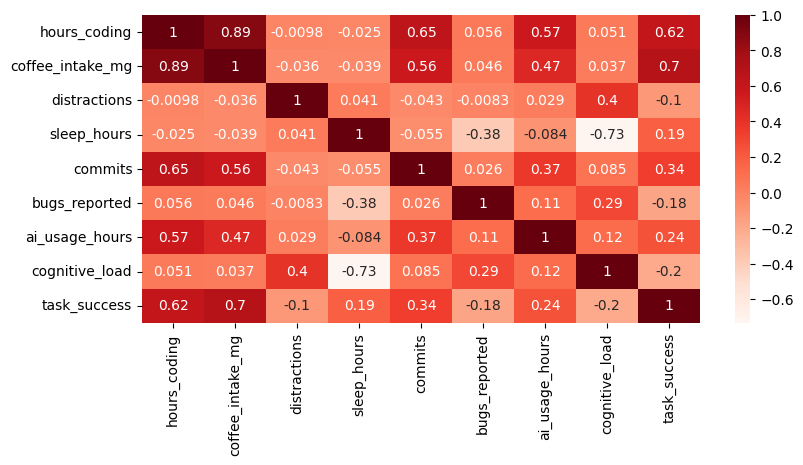

In [12]:
# visualize the correlation of the data
plt.figure(figsize=(9,4))
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.show()

#### Key Insights from the Correlation Heatmap
##### Strong Positive Correlations:
task_success & coffee_intake_mg → 0.70<br>
More coffee intake is strongly associated with higher task success.

task_success & hours_coding → 0.62<br>
More coding hours → higher task success.<br>
Makes sense for developer productivity.

hours_coding & coffee_intake_mg → 0.89<br>
Those who code longer also consume more coffee.<br>
Suggests a behavioral pattern among developers.

commits & hours_coding → 0.65<br>
More coding hours lead to more commits — consistent with expected behavior.

task_success & commits → 0.34<br>
Moderate relationship — more commits can indicate better progress/success.

##### Negative Correlations (Potential Red Flags):
sleep_hours & cognitive_load → -0.73<br>
Less sleep is strongly associated with higher cognitive load (mental stress).<br>
Sign of burnout risk — monitor well-being.

sleep_hours & ai_usage_hours → -0.084<br>
Very weak negative correlation — AI use doesn’t significantly impact sleep.

task_success & distractions → -0.10<br>
Slight negative correlation — distractions slightly reduce task success.

##### Neutral/Low Correlations:
bugs_reported has weak correlations with most variables — likely not a direct productivity indicator.<br>
distractions has low impact across the board but slightly correlates with cognitive load (0.4).

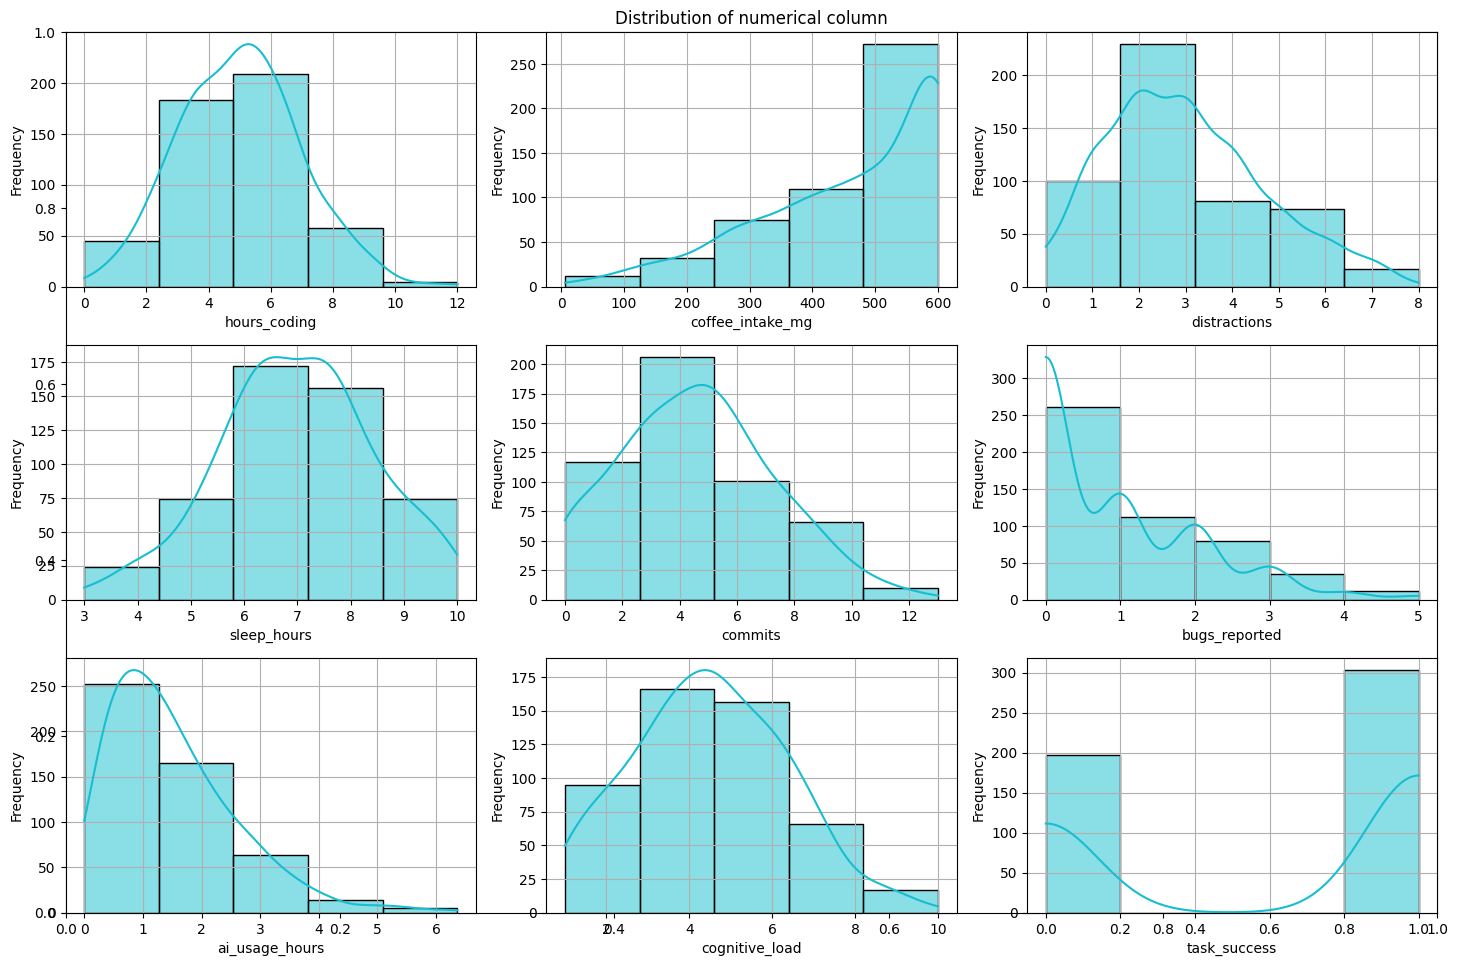

In [13]:
# checking for the distribution of numerical columns
plt.figure(figsize=(15,10))
plt.title("Distribution of numerical column")
a = 1
for column in df:
    plt.subplot(3,3,a)
    sns.histplot(df[column], kde=True, bins=5, color='C9')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    a +=1 
plt.show()

#### Distribution Analysis Report
1. **Hours Coding**<br>
Shape: Slightly right-skewed.<br>
Observation: Most developers code between 4 to 8 hours daily, with fewer spending more than 10 hours.<br>
Insight: Indicates a typical full workday pattern, suggesting consistency in coding effort.

2. **Coffee Intake (mg)**<br>
Shape: Strong right-skew.<br>
Observation: A majority consume low to moderate caffeine (100–300 mg), with a sharp rise towards the upper end (500–600 mg).<br>
Insight: Heavy caffeine intake is common among some developers, possibly to sustain longer work sessions.

3. **Distractions**<br>
Shape: Slightly right-skewed.<br>
Observation: Most developers face 2–3 distractions per day, but some experience up to 8.<br>
Insight: While a few remain highly focused, distractions are a regular issue for many.

4. **Sleep Hours**<br>
Shape: Approximately normal.<br>
Observation: Peak between 6.5 to 8 hours, which is considered healthy.<br>
Insight: Developers generally maintain adequate sleep, essential for productivity and lower cognitive load.

5. **Commits**<br>
Shape: Slightly right-skewed.<br>
Observation: Most developers make 4–6 commits daily, with some contributing up to 12+.<br>
Insight: Indicates consistent coding output, with a subset being highly productive.

6. **Bugs Reported**<br>
Shape: Strong right-skew.<br>
Observation: Most sessions have 0 to 1 bug, few report 3+.<br>
Insight: Code quality is generally high, though a small fraction consistently faces more issues.

7. **AI Usage Hours**<br>
Shape: Exponentially decreasing (right-skewed).<br>
Observation: Most developers use AI tools for <2 hours, with usage dropping sharply beyond that.<br>
Insight: AI tools are adopted but not heavily relied on by most users.

8. **Cognitive Load**<br>
Shape: Roughly normal.<br>
Observation: Most developers report moderate load (scores around 4–6).<br>
Insight: Workload is balanced, though extremes exist possibly due to task complexity or environment.

9. **Task Success**<br>
Shape: Bimodal (U-shaped).<br>
Observation: Many developers either have very low or very high success rates, fewer fall in between.<br>
Insight: Success tends to be polarized, which may point to varying experience levels or tool proficiency.

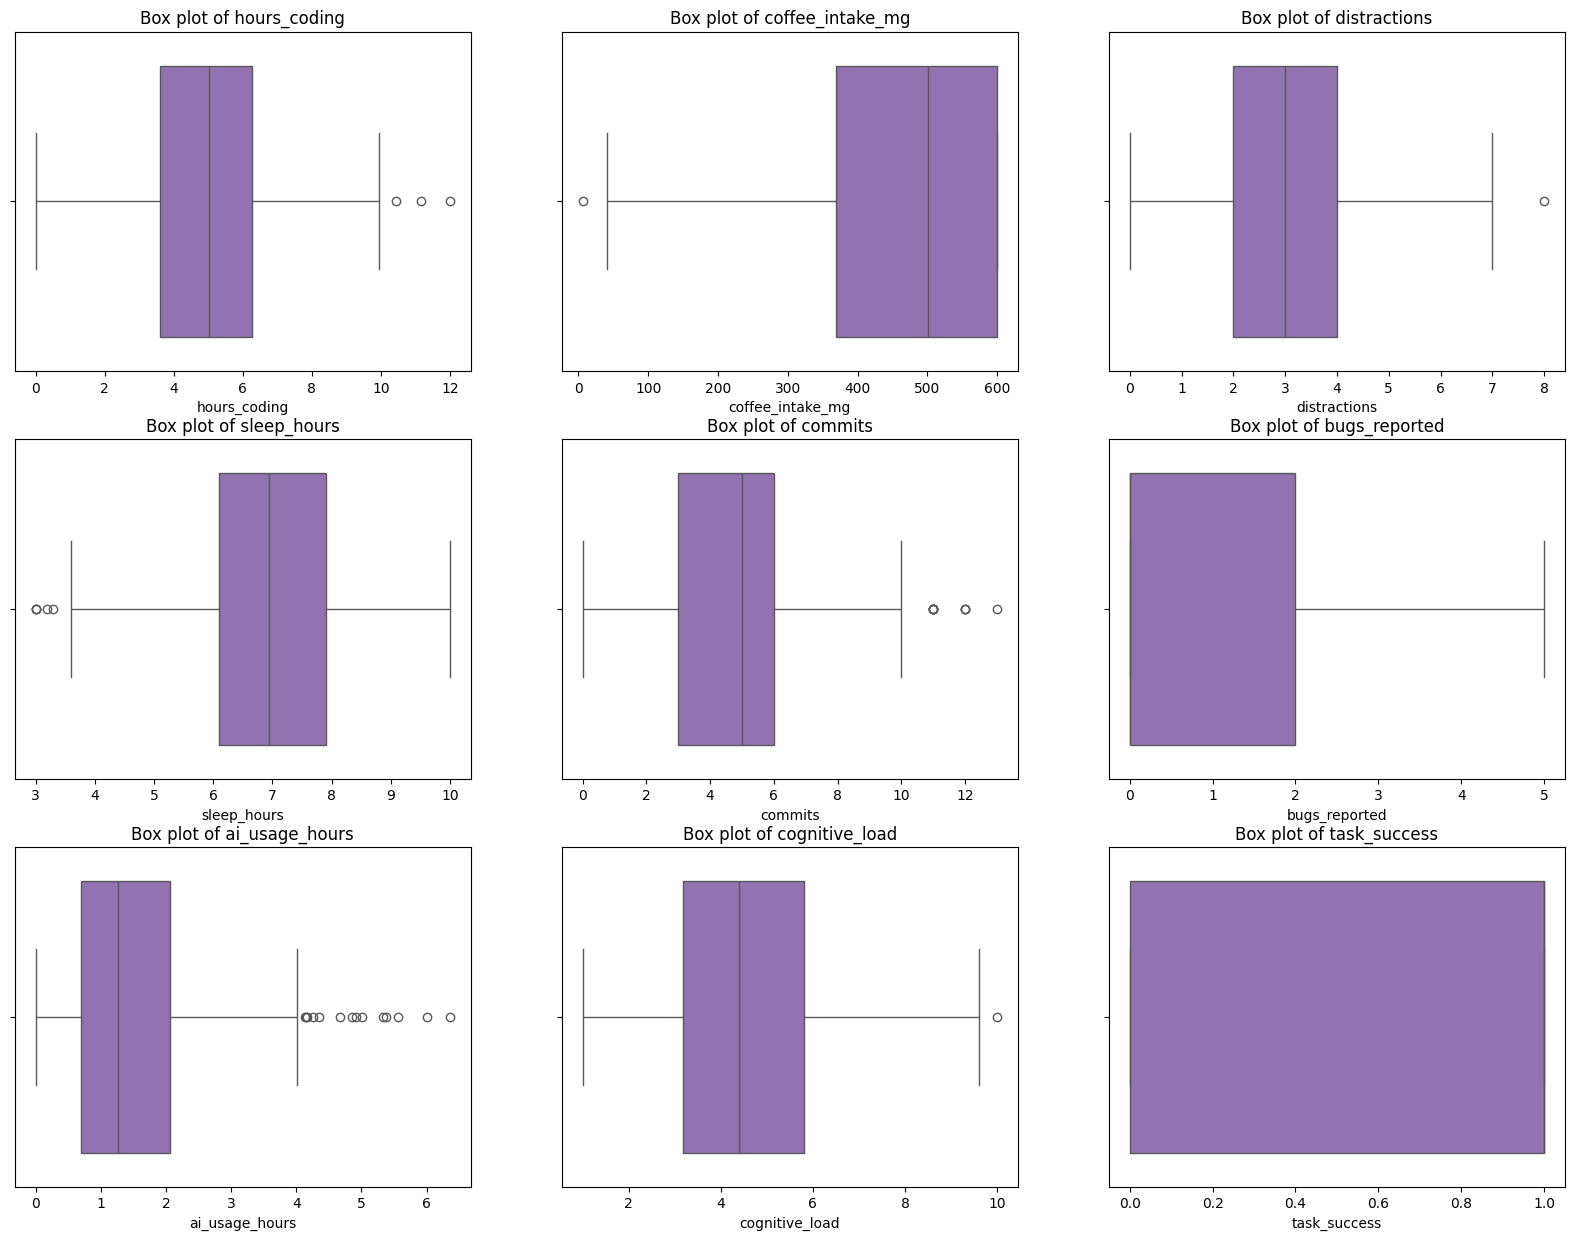

In [14]:
# visualizing outliers
i = 1
plt.figure(figsize=(20,15))
for colom in df:
    plt.subplot(3,3,i)
    sns.boxplot(x = df[colom], color='C4')
    plt.title(f'Box plot of {colom}')
    i += 1
plt.show()

#### Outliers Analysis
1. **hours_coding**<br>
Outliers: >10 hours of coding per day.<br>
Insight: A few developers are working significantly longer hours, which could lead to burnout or reduced productivity over time.

2. **coffee_intake_mg**<br>
Outliers: <100 mg of caffeine.<br>
Insight: A small number of individuals consume very little caffeine, which is unusual for the typical developer profile. They might rely on other energy sources or have high natural alertness.

3. **distractions**<br>
Outliers: 7–8 distractions in a day.<br>
Insight: A few developers experience excessive distractions, which may severely affect their focus and productivity. Identifying sources of these distractions could help improve efficiency.

4. **sleep_hours**<br>
Outliers: <4 hours of sleep.<br>
Insight: Individuals getting very little sleep are likely to face cognitive and health issues. Poor sleep can negatively affect problem-solving and coding performance.

5. **commits**<br>
Outliers: >10 commits/day.<br>
Insight: High commit counts may reflect very granular work habits or frequent small code updates. Could be positive if it's continuous improvement—or negative if it's due to bugs or poor planning.

6. **bugs_reported**<br>
Outliers: 4–5 bugs/day.<br>
Insight: A few developers report significantly more bugs, possibly indicating either:<br>
They're working on more complex parts of the codebase, or<br>
Their code quality needs improvement.<br>

7. **ai_usage_hours**<br>
Outliers: >4–6 hours/day.<br>
Insight: Heavy reliance on AI tools may show overdependence or an experimental workflow. It might boost productivity, but excessive use without understanding can lead to shallow learning or errors.

8. **cognitive_load**<br>
Outliers: ~10 (high cognitive load).<br>
Insight: A few developers are mentally overwhelmed. High load may result in fatigue, errors, or slower work—possibly linked to low sleep or many distractions.

9. **task_success**<br>
No outliers (binary variable with values 0 or 1).

In [15]:
# checkin for the task_success column
task_success = df['task_success'].value_counts()
task_success

task_success
1    303
0    197
Name: count, dtype: int64

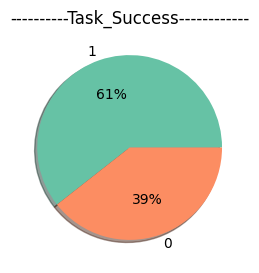

In [16]:
# visualization of task_success column with pie chart
plt.figure(figsize=(5,3))
plt.pie(task_success.values, labels=task_success.index,
       autopct='%2.f%%', textprops={'fontsize':10},
       colors = sns.color_palette('Set2') , shadow=True)
plt.title('----------Task_Success------------')
plt.show()

61% developers compeleated their task successfully and <br>
39% developers failed to compeleate their task

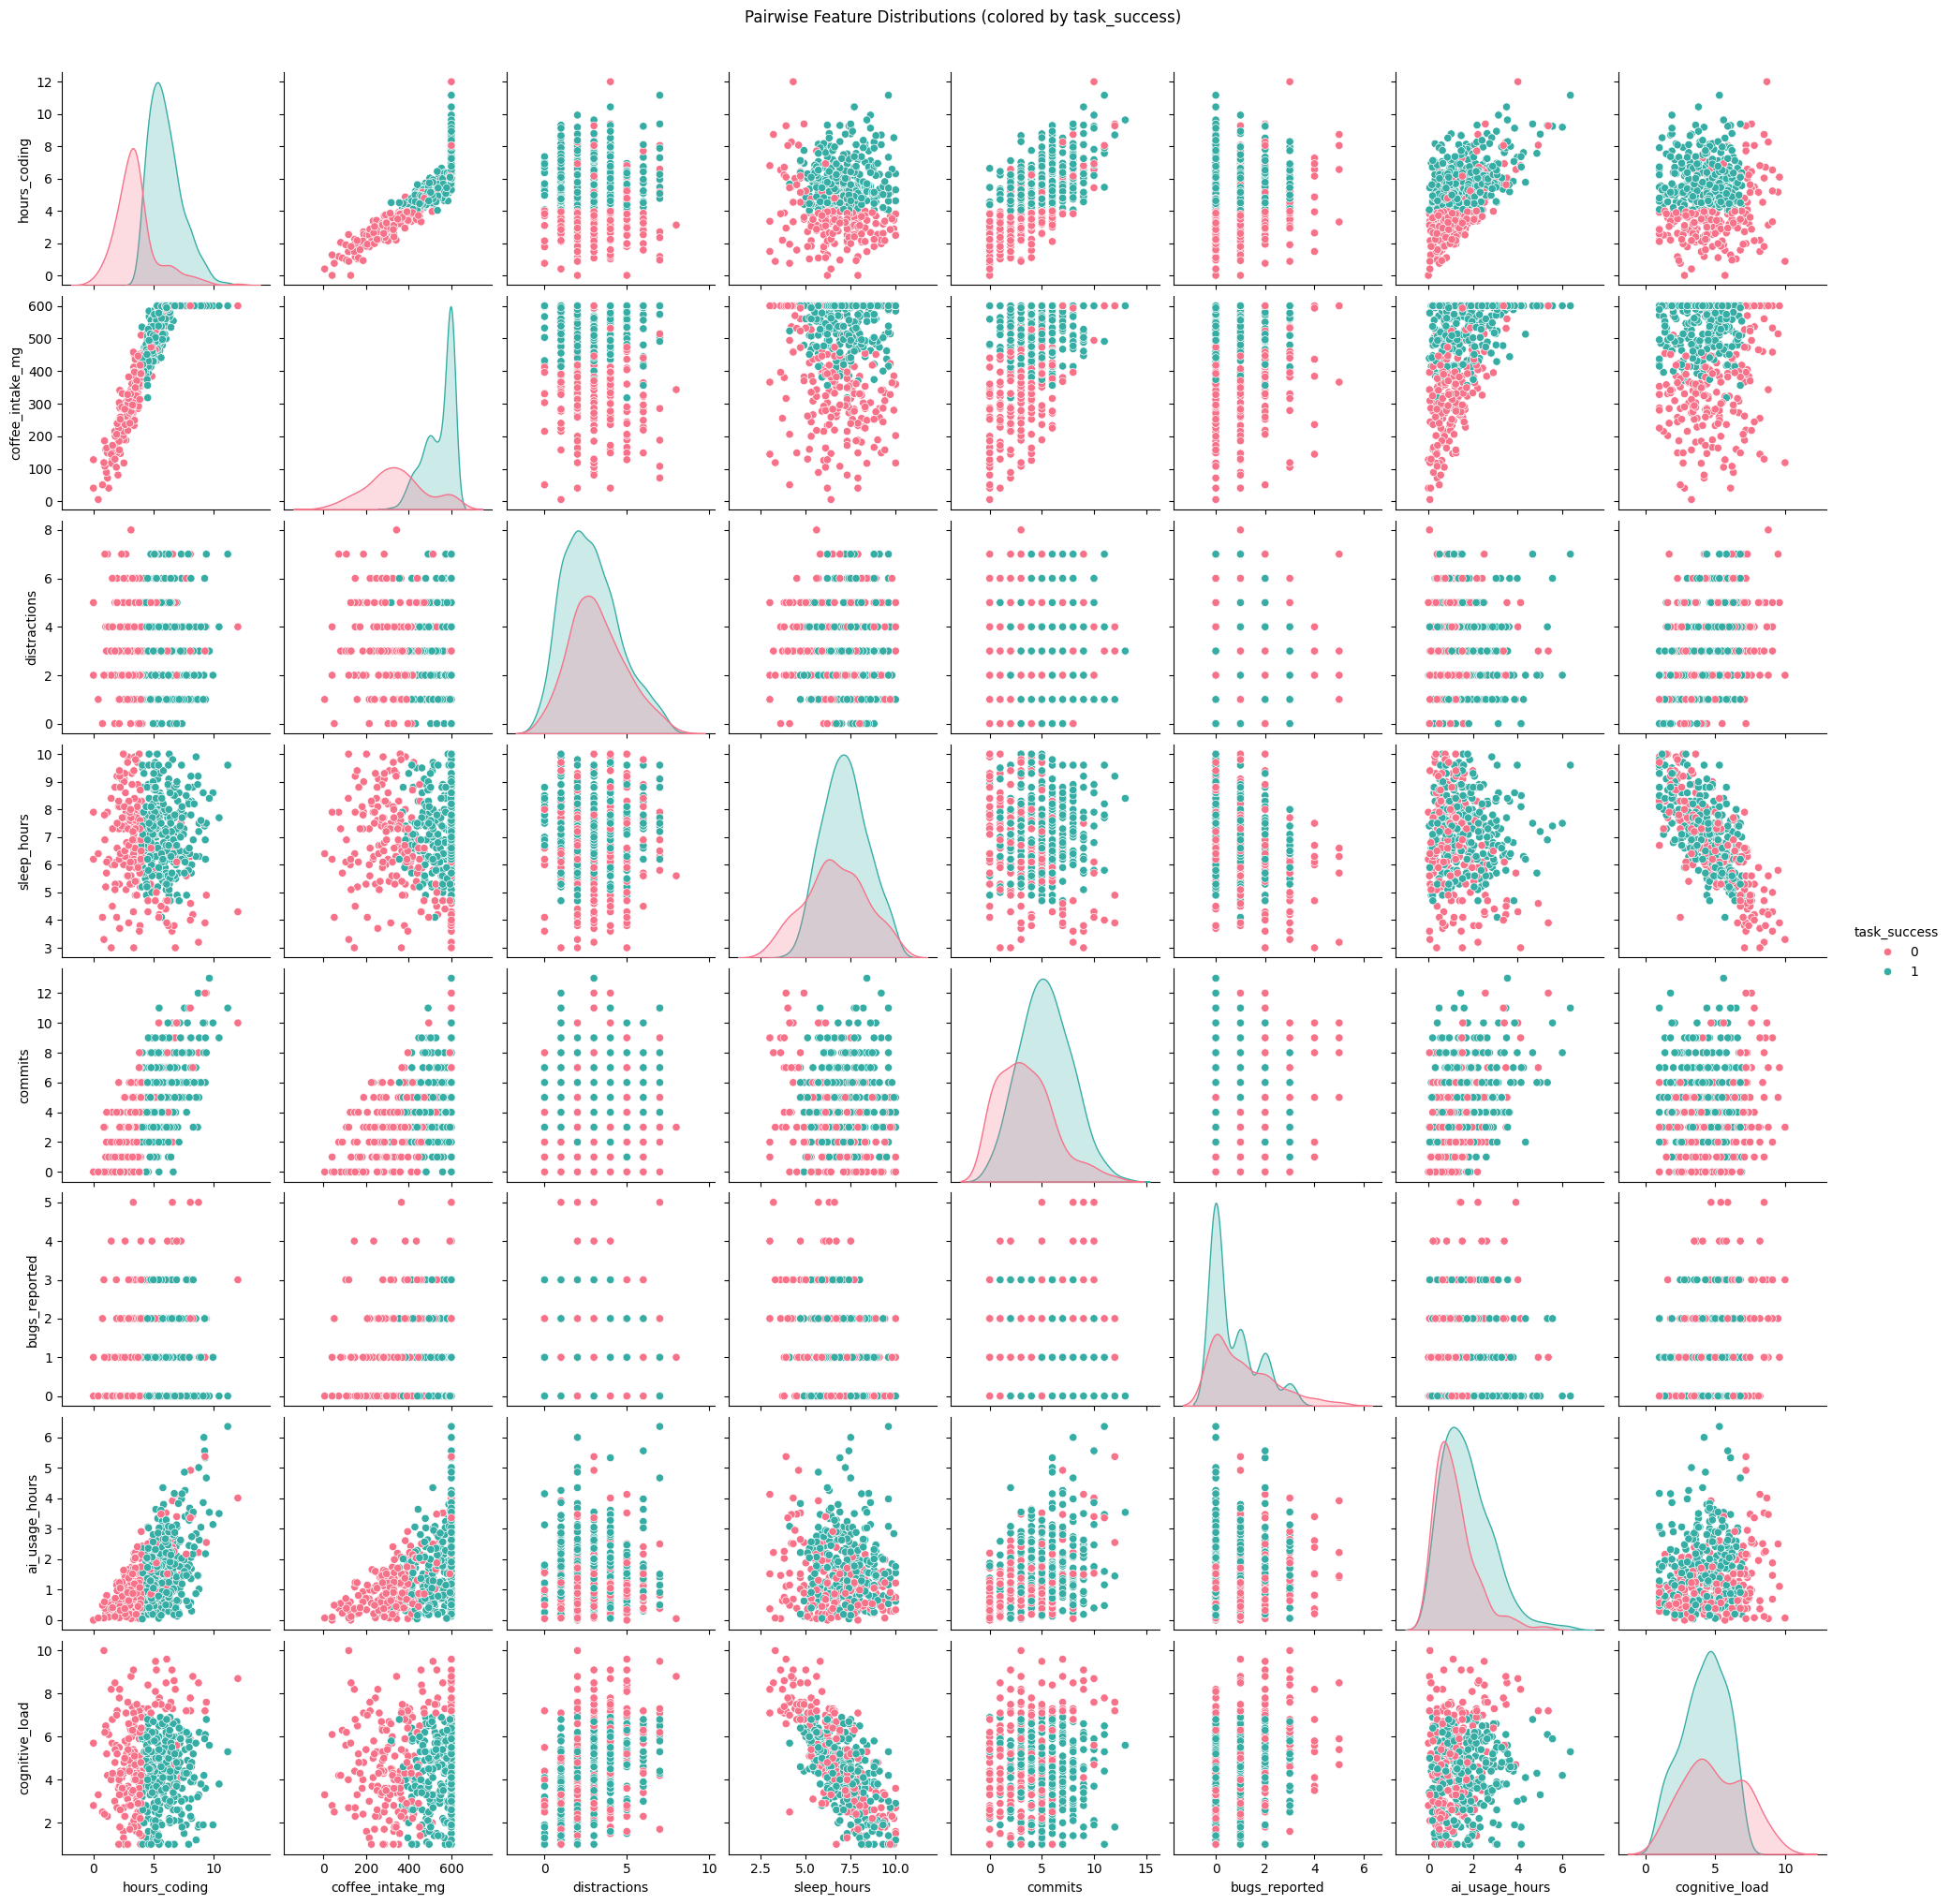

In [17]:
# visualization of pair plot
sns.pairplot(df, hue="task_success", palette="husl")
plt.suptitle('Pairwise Feature Distributions (colored by task_success)', y=1.02)
plt.show()

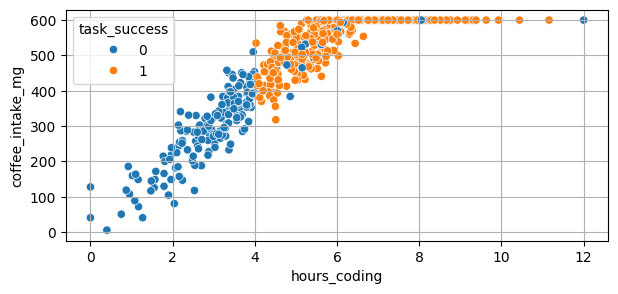

In [18]:
# visualize the scatter plot between hours_coding and coffee_intake_mg with task_success
plt.figure(figsize=(7,3))
sns.scatterplot(x=df['hours_coding'], y=df['coffee_intake_mg'], hue=df['task_success'])
plt.grid()
plt.show()

There is a kind of linear relationship between hours_coding and coffee_intake_mg<br>
This graph also shows that high hours_coding leads to success the task

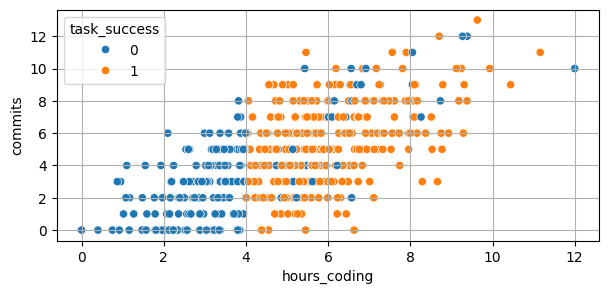

In [19]:
# visualize the scatter plot between hours_coding and commits with task_success
plt.figure(figsize=(7,3))
sns.scatterplot(x=df['hours_coding'], y=df['commits'], hue=df['task_success'])
plt.grid()
plt.show()

Successful AI devs code regularly (4–10 hrs) and commit frequently (5–10 times/day).<br>
Low-effort tasks (low hours + few commits) tend to fail more.<br>
Encourage:<br>
- Regular coding hours (not minimal, not extreme).
- Frequent commits for better tracking and version control.

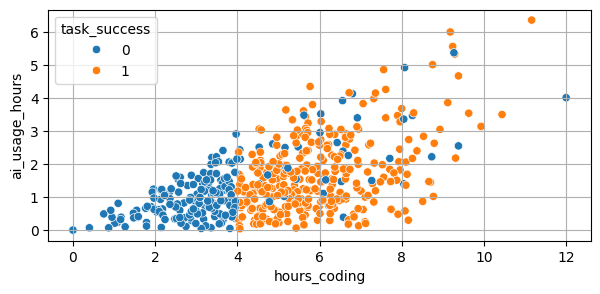

In [20]:
# visualize the scatter plot between hours_coding and ai_usage_hours with task_success
plt.figure(figsize=(7,3))
sns.scatterplot(x=df['hours_coding'], y=df['ai_usage_hours'], hue=df['task_success'])
plt.grid()
plt.show()

Balanced effort is key: <br>
- Tasks are most successful when developers code for 4–8 hours/day and use AI tools for 1–4 hours/day.
- AI tools enhance productivity, but only when combined with sufficient hands-on coding.
- Too little or too much of either (coding or AI use) is associated with higher task failure rates.

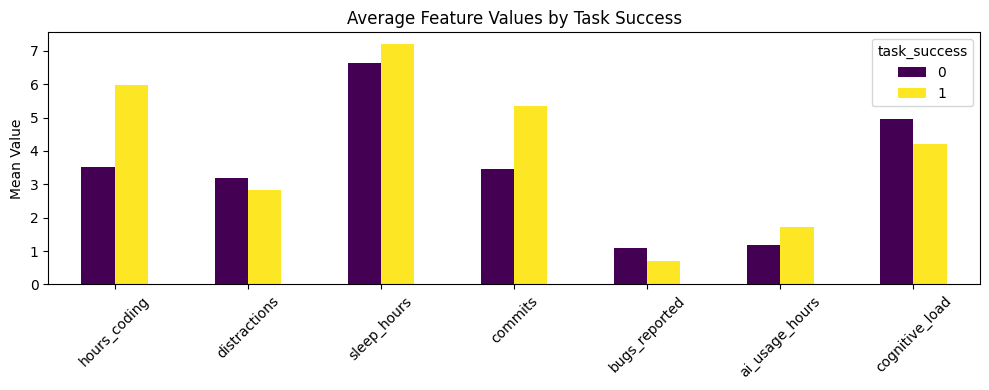

In [21]:
# visualization of Bar Plot : Average of Features by Task Success
feature_cols = ['hours_coding', 'distractions', 'sleep_hours', 
                'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load']

df.groupby('task_success')[feature_cols].mean().T.plot(kind='bar', figsize=(10, 4), colormap='viridis')
plt.title('Average Feature Values by Task Success')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Key Observations:
**Hours Coding:**<br>
Higher average for successful tasks (6 hours) compared to unsuccessful tasks (3.5 hours).<br>
Indicates a positive correlation between more coding time and task success.
    
**Distractions:**<br>
Slightly higher for unsuccessful tasks.<br>
Suggests that more distractions may negatively impact task success.

**Sleep Hours:**<br>
Successful developers averaged more sleep (7 hours) than unsuccessful ones (6.5 hours).<br>
Implies that adequate rest might contribute to better performance.

**Commits:**<br>
Successful tasks had significantly more commits (5.5) than unsuccessful ones (3.2).<br>
Indicates that frequent commits may be a marker of productive progress.

**Bugs Reported:**<br>
Fewer bugs were reported in successful tasks (0.7 vs 1.1).<br>
Fewer bugs are associated with more successful outcomes.

**AI Usage Hours:**<br>
AI tools were used more in successful tasks (1.6 hours) than unsuccessful ones (1.1 hours).<br>
Suggests a supportive role of AI tools in achieving success.

**Cognitive Load:**<br>
Unsuccessful tasks were associated with higher cognitive load (5) than successful ones (4.2).<br>
Indicates that high cognitive strain might reduce chances of success.

### Summery
- Coding hours and commits show a positive trend with task_success.
- Distractions and bugs_reported negatively impact productivity.
- Moderate AI usage and sleep correlate with better outcomes.
- Coffee intake is generally high but has no strong visual correlation with task success.
- Cognitive load appears higher for some developers, possibly linked to higher bug counts or overwork.